In [10]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelBinarizer
from sklearn import linear_model
import csv
from sklearn.metrics import r2_score
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns


In [3]:

with open("dataset/csv/01-12/DrDoS_NTP.csv") as csv_file:
 
    # creating an object of csv reader
    # with the delimiter as ,
    csv_reader = csv.reader(csv_file, delimiter = ',')
 
    # list to store the names of columns
    list_of_column_names = []
 
    # loop to iterate through the rows of csv
    for row in csv_reader:
 
        # adding the first row
        list_of_column_names.append(row)
 
        # breaking the loop after the
        # first iteration itself
        break

In [16]:

data = pd.read_csv('dataset/csv/01-12/DrDoS_NTP.csv', delimiter=',', nrows = 100)
data.dataframeName = 'DrDoS_NTP.csv'
data.columns = data.columns.str.strip()
lb = LabelBinarizer()
data['Label'] = lb.fit_transform(data['Label'].values)
targets = data['Label']

nRow, nCol = data.shape

data_chosen = data[[' Label',' Total Fwd Packets']].copy()
print(data_chosen)

KeyError: "None of [Index([' Label', ' Total Fwd Packets'], dtype='object')] are in the [columns]"

In [12]:


train = data_chosen[:(int((len(data_chosen)*0.8)))]
test = data_chosen[:(int((len(data_chosen)*0.8)))]


regr = linear_model.LinearRegression()

train_x = np.array(train[[" Label"]])
train_y = np.array(train[[" Total Fwd Packets"]])

regr.fit(train_x,train_y)

print("Coefficients : ", regr.coef_)
print("Intercepet : ",regr.intercept_)

ValueError: could not convert string to float: 'DrDoS_NTP'

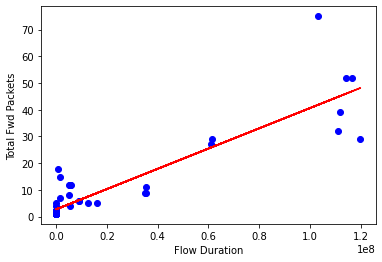

In [6]:
plt.scatter(train[" Flow Duration"], train[" Total Fwd Packets"],color="blue")
plt.plot(train_x,regr.coef_*train_x + regr.intercept_, '-r')
plt.xlabel("Flow Duration")
plt.ylabel("Total Fwd Packets")
plt.show()

In [7]:
def get_regression_predictions(input_features,intercept,slope):
 predicted_values = input_features*slope + intercept
 return predicted_values

In [8]:
flow_duration = 500
estimatd_packets = get_regression_predictions(flow_duration,regr.intercept_[0],regr.coef_[0][0])
print ("Estimated Total Fwd Packets : ",estimatd_packets)

Estimated Total Fwd Packets :  2.7119731720661093


In [9]:
test_x = np.array(test[[" Flow Duration"]])
test_y = np.array(test[[" Total Fwd Packets"]])
test_y_ = regr.predict(test_x)

In [10]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Mean sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )


Mean absolute error: 2.86
Mean sum of squares (MSE): 31.80
R2-score: 0.77


In [11]:
data_chosen = data[['Flow ID', ' Source IP', ' Source Port', 
' Destination IP', ' Destination Port', ' Protocol', 
' Total Fwd Packets', ' Total Backward Packets', 
'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
'Flow Bytes/s', ' Flow Packets/s',
' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',  
'FIN Flag Count', ' SYN Flag Count', ' RST Flag Count', 
' PSH Flag Count', ' ACK Flag Count', ' URG Flag Count', ' CWE Flag Count', ' ECE Flag Count', 
'Fwd Avg Bytes/Bulk', ' Fwd Avg Packets/Bulk', ' Fwd Avg Bulk Rate', 
' Bwd Avg Bytes/Bulk', ' Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate', 'Subflow Fwd Packets',' Flow Duration']].copy()


In [12]:
d = dict([(y,x+1) for x,y in enumerate(sorted(set(list(data_chosen['Flow ID'].unique()))))])
data_chosen['Flow_ID_index'] = data['Flow ID'].map(d)
# print(d)

d = dict([(y,x+1) for x,y in enumerate(sorted(set(list(data_chosen[' Source IP'].unique()))))])
data_chosen['Source_IP_index'] = data[' Source IP'].map(d)
# print(d)

In [13]:
d = dict([(y,x+1) for x,y in enumerate(sorted(set(list(data_chosen[' Destination IP'].unique()))))])
data_chosen['Destination_IP_index'] = data[' Destination IP'].map(d)

In [14]:
d = dict([(y,x+1) for x,y in enumerate(sorted(set(list(data_chosen[' Protocol'].unique()))))])
data_chosen['Protocol_index'] = data[' Protocol'].map(d)

In [15]:


data_selected = data_chosen[['Flow_ID_index', 'Source_IP_index', ' Source Port', 
'Destination_IP_index', ' Destination Port', 'Protocol_index', 
' Total Fwd Packets', ' Total Backward Packets', 
'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
'Flow Bytes/s', ' Flow Packets/s',
' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',  
'FIN Flag Count', ' SYN Flag Count', ' RST Flag Count', 
' PSH Flag Count', ' ACK Flag Count', ' URG Flag Count', ' CWE Flag Count', ' ECE Flag Count', 
'Fwd Avg Bytes/Bulk', ' Fwd Avg Packets/Bulk', ' Fwd Avg Bulk Rate', 
' Bwd Avg Bytes/Bulk', ' Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate', 'Subflow Fwd Packets',' Flow Duration']].copy()
# print(data_selected)

X = data_chosen[['Flow_ID_index', 'Source_IP_index', ' Source Port', 
'Destination_IP_index', ' Destination Port', 'Protocol_index', 
' Total Fwd Packets', ' Total Backward Packets', 
'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
'Flow Bytes/s', ' Flow Packets/s',
' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',  
'FIN Flag Count', ' SYN Flag Count', ' RST Flag Count', 
' PSH Flag Count', ' ACK Flag Count', ' URG Flag Count', ' CWE Flag Count', ' ECE Flag Count', 
'Fwd Avg Bytes/Bulk', ' Fwd Avg Packets/Bulk', ' Fwd Avg Bulk Rate', 
' Bwd Avg Bytes/Bulk', ' Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate', 'Subflow Fwd Packets',' Flow Duration']].copy()

In [16]:


Y = data[' Flow Duration']

# # Generating training and testing data from our data:
# # We are using 80% data for training.
train = data_selected[:(int((len(data)*0.8)))]
test = data_selected[(int((len(data)*0.8))):]

# #Modeling:
# #Using sklearn package to model data :
regr = linear_model.LinearRegression()

train_x = np.array(train[['Flow_ID_index', 'Source_IP_index', ' Source Port', 
'Destination_IP_index', ' Destination Port', 'Protocol_index', 
' Total Fwd Packets', ' Total Backward Packets', 
'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
'Flow Bytes/s', ' Flow Packets/s',
' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',  
'FIN Flag Count', ' SYN Flag Count', ' RST Flag Count', 
' PSH Flag Count', ' ACK Flag Count', ' URG Flag Count', ' CWE Flag Count', ' ECE Flag Count', 
'Fwd Avg Bytes/Bulk', ' Fwd Avg Packets/Bulk', ' Fwd Avg Bulk Rate', 
' Bwd Avg Bytes/Bulk', ' Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate', 'Subflow Fwd Packets']])

train_y = np.array(train[' Flow Duration'])

test_x = np.array(test[['Flow_ID_index', 'Source_IP_index', ' Source Port', 
'Destination_IP_index', ' Destination Port', 'Protocol_index', 
' Total Fwd Packets', ' Total Backward Packets', 
'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
'Flow Bytes/s', ' Flow Packets/s',
' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',  
'FIN Flag Count', ' SYN Flag Count', ' RST Flag Count', 
' PSH Flag Count', ' ACK Flag Count', ' URG Flag Count', ' CWE Flag Count', ' ECE Flag Count', 
'Fwd Avg Bytes/Bulk', ' Fwd Avg Packets/Bulk', ' Fwd Avg Bulk Rate', 
' Bwd Avg Bytes/Bulk', ' Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate', 'Subflow Fwd Packets']])
test_y = np.array(test[' Flow Duration'])


regr.fit(train_x,train_y)


LinearRegression()

R² : -4.908821404226669


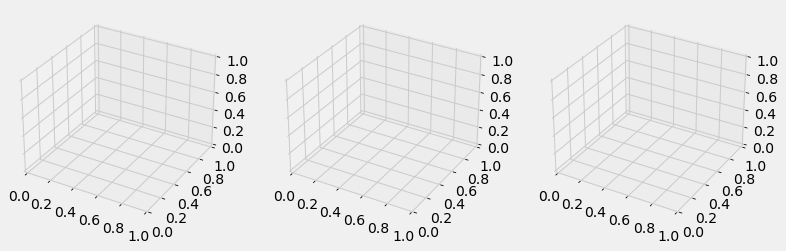

In [17]:

#Now let’s do prediction of data:
Y_pred = regr.predict(test_x)
# Check accuracy:
r2 = r2_score(test_y , Y_pred)
print ("R² :",r2)

df_pie = data_chosen[['Flow_ID_index', 'Source_IP_index','Destination_IP_index']]

# Prepare data
X = df_pie[['Flow_ID_index', 'Source_IP_index']].values.reshape(-1,2)
Y = df_pie['Destination_IP_index']

# Create range for each dimension
x = X[:, 0]
y = X[:, 1]
z = Y


xx_pred = np.linspace(40, 90, 30)  # range 
yy_pred = np.linspace(20, 50, 30)  # range 
xx_pred, yy_pred = np.meshgrid(xx_pred, yy_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T


ols = linear_model.LinearRegression()
model = ols.fit(X, Y)
predicted = model.predict(model_viz)

# Plot model visualization
plt.style.use('fivethirtyeight')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

In [19]:

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('Flow_ID_index', fontsize=12)
    ax.set_ylabel('Source_IP_index', fontsize=12)
    ax.set_zlabel('Destination_IP_index', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.view_init(elev=25, azim=-60)
ax2.view_init(elev=15, azim=15)
ax3.view_init(elev=25, azim=60)

fig.suptitle('Multi-Linear Regression Model Visualization ($R^2 = %.2f$)' % r2, fontsize=15, color='k')

fig.tight_layout()

plt.show()